In [81]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
import warnings
from sklearn.metrics import classification_report
warnings.filterwarnings('ignore')

In [82]:
df=pd.read_csv("Crop_recommendation.csv")

In [83]:
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [84]:
df.shape

(2200, 8)

In [85]:
#Statistical Information
df.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


In [86]:
#Types of features
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [87]:
#Checking number of Unique values in Dataset
df.apply(lambda x: len(x.unique()))

N               137
P               117
K                73
temperature    2200
humidity       2200
ph             2200
rainfall       2200
label            22
dtype: int64

In [88]:
#Checking for Null Values
df.isnull().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

In [89]:
df['label'].unique()

array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],
      dtype=object)

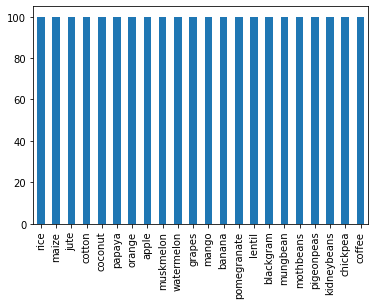

In [90]:
df["label"].value_counts().plot(kind="bar")
plt.show()

<AxesSubplot:>

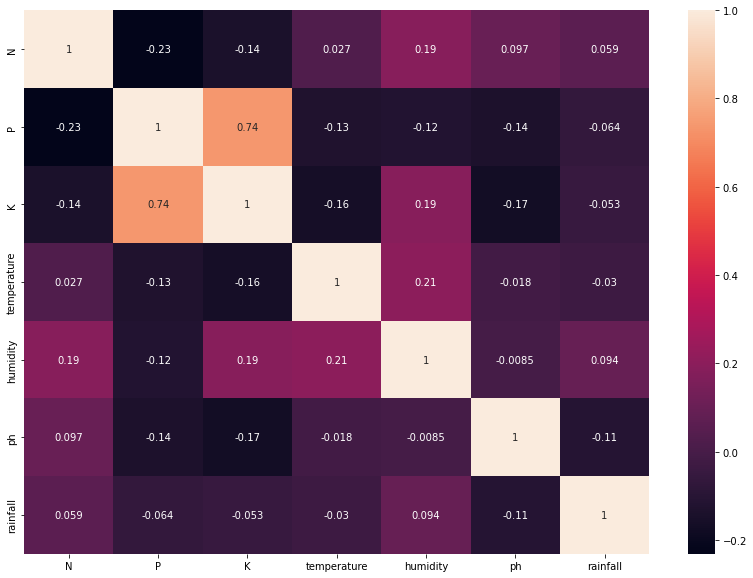

In [91]:
correlation=df.corr()
plt.figure(figsize=(14,10))
sns.heatmap(correlation,annot=True)

##### Observation

K and P are dependent on each other
and Every other feature in the data set are independent to each other





## Training Dataset






In [92]:
X=df.iloc[:,:-1]
Y=df.iloc[:,-1]

In [93]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.30, random_state = 0)

#### Feature Scaling

In [94]:
std_scalar = StandardScaler()
X_train = std_scalar.fit_transform(X_train)
X_test = std_scalar.transform(X_test)

#### Logistic Regression

In [95]:
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, Y_train)
Y_pred = classifier.predict(X_test)
LR_acc = accuracy_score(Y_test, Y_pred)
print("Logistic Regression Accuracy :", LR_acc)

Logistic Regression Accuracy : 0.9606060606060606


In [96]:
LR_cv = cross_val_score(classifier, X, Y, cv=5)
print("LR_CV_Score Mean Accuracy :",LR_cv.mean())

LR_CV_Score Mean Accuracy : 0.9545454545454545


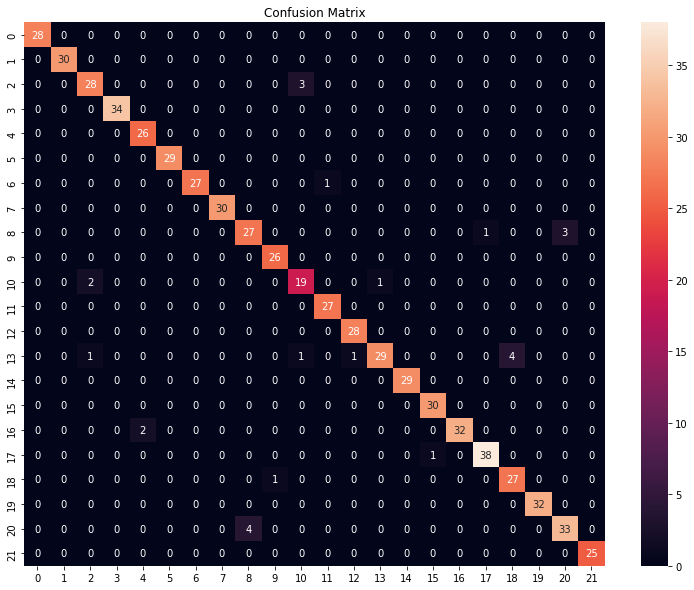

In [97]:
plt.figure(figsize=(13,10))
sns.heatmap(confusion_matrix(Y_test,Y_pred),annot=True)
plt.title("Confusion Matrix")
plt.show()

In [98]:
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        28
      banana       1.00      1.00      1.00        30
   blackgram       0.90      0.90      0.90        31
    chickpea       1.00      1.00      1.00        34
     coconut       0.93      1.00      0.96        26
      coffee       1.00      1.00      1.00        29
      cotton       1.00      0.96      0.98        28
      grapes       1.00      1.00      1.00        30
        jute       0.87      0.87      0.87        31
 kidneybeans       0.96      1.00      0.98        26
      lentil       0.83      0.86      0.84        22
       maize       0.96      1.00      0.98        27
       mango       0.97      1.00      0.98        28
   mothbeans       0.97      0.81      0.88        36
    mungbean       1.00      1.00      1.00        29
   muskmelon       0.97      1.00      0.98        30
      orange       1.00      0.94      0.97        34
      papaya       0.97    

#### K-Nearest Neigbours

In [99]:
classifier = KNeighborsClassifier(n_neighbors=4, metric='minkowski', p=2)
classifier.fit(X_train, Y_train)
Y_pred = classifier.predict(X_test)
KNN_acc = accuracy_score(Y_test, Y_pred)
print("K-NN Accuracy :", KNN_acc)

K-NN Accuracy : 0.9742424242424242


In [100]:
KNN_cv = cross_val_score(classifier, X, Y, cv=5)
print("CV_Score Mean Accuracy :",KNN_cv.mean())

CV_Score Mean Accuracy : 0.9790909090909091


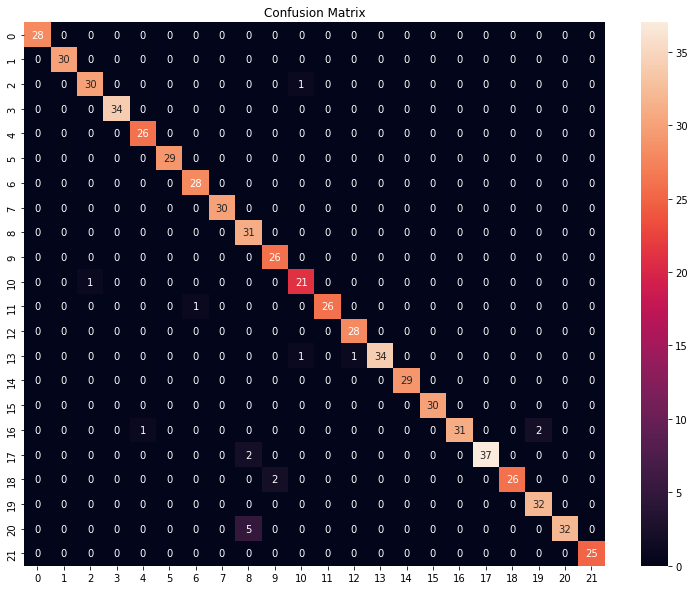

In [101]:
plt.figure(figsize=(13,10))
sns.heatmap(confusion_matrix(Y_test,Y_pred),annot=True)
plt.title("Confusion Matrix")
plt.show()

In [102]:
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        28
      banana       1.00      1.00      1.00        30
   blackgram       0.97      0.97      0.97        31
    chickpea       1.00      1.00      1.00        34
     coconut       0.96      1.00      0.98        26
      coffee       1.00      1.00      1.00        29
      cotton       0.97      1.00      0.98        28
      grapes       1.00      1.00      1.00        30
        jute       0.82      1.00      0.90        31
 kidneybeans       0.93      1.00      0.96        26
      lentil       0.91      0.95      0.93        22
       maize       1.00      0.96      0.98        27
       mango       0.97      1.00      0.98        28
   mothbeans       1.00      0.94      0.97        36
    mungbean       1.00      1.00      1.00        29
   muskmelon       1.00      1.00      1.00        30
      orange       1.00      0.91      0.95        34
      papaya       1.00    

#### Support Vector Machine

In [103]:
classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(X_train, Y_train)
Y_pred = classifier.predict(X_test)
SVM_acc = accuracy_score(Y_test, Y_pred)
print("SVM Accuracy :", SVM_acc)

SVM Accuracy : 0.9848484848484849


In [104]:
SVM_cv = cross_val_score(classifier, X, Y, cv=5)
print("SVM_CV_Score Mean Accuracy :",SVM_cv.mean())

SVM_CV_Score Mean Accuracy : 0.985


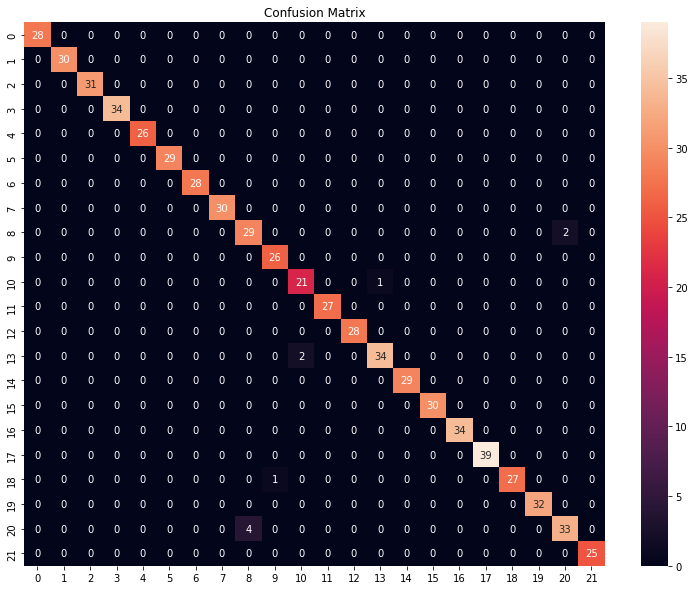

In [105]:
plt.figure(figsize=(13,10))
sns.heatmap(confusion_matrix(Y_test,Y_pred),annot=True)
plt.title("Confusion Matrix")
plt.show()

In [106]:
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        28
      banana       1.00      1.00      1.00        30
   blackgram       1.00      1.00      1.00        31
    chickpea       1.00      1.00      1.00        34
     coconut       1.00      1.00      1.00        26
      coffee       1.00      1.00      1.00        29
      cotton       1.00      1.00      1.00        28
      grapes       1.00      1.00      1.00        30
        jute       0.88      0.94      0.91        31
 kidneybeans       0.96      1.00      0.98        26
      lentil       0.91      0.95      0.93        22
       maize       1.00      1.00      1.00        27
       mango       1.00      1.00      1.00        28
   mothbeans       0.97      0.94      0.96        36
    mungbean       1.00      1.00      1.00        29
   muskmelon       1.00      1.00      1.00        30
      orange       1.00      1.00      1.00        34
      papaya       1.00    

#### Decision Trees

In [107]:
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(X_train, Y_train)
Y_pred = classifier.predict(X_test)
DT_acc = accuracy_score(Y_test, Y_pred)
print("Decision Tree Classification's Accuracy :", DT_acc)

Decision Tree Classification's Accuracy : 0.9803030303030303


In [108]:
DT_cv = cross_val_score(classifier, X, Y, cv=5)
print("DT_CV_Score Mean Accuracy :",DT_cv.mean())

DT_CV_Score Mean Accuracy : 0.9827272727272728


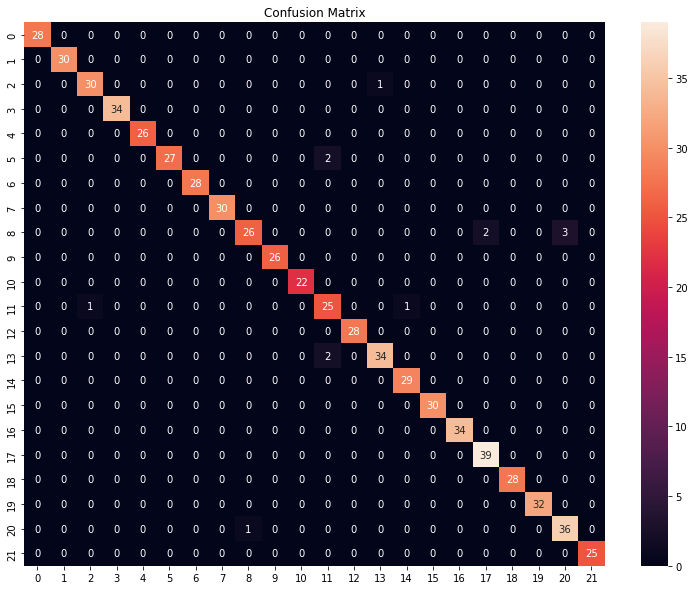

In [109]:
plt.figure(figsize=(13,10))
sns.heatmap(confusion_matrix(Y_test,Y_pred),annot=True)
plt.title("Confusion Matrix")
plt.show()

In [110]:
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        28
      banana       1.00      1.00      1.00        30
   blackgram       0.97      0.97      0.97        31
    chickpea       1.00      1.00      1.00        34
     coconut       1.00      1.00      1.00        26
      coffee       1.00      0.93      0.96        29
      cotton       1.00      1.00      1.00        28
      grapes       1.00      1.00      1.00        30
        jute       0.96      0.84      0.90        31
 kidneybeans       1.00      1.00      1.00        26
      lentil       1.00      1.00      1.00        22
       maize       0.86      0.93      0.89        27
       mango       1.00      1.00      1.00        28
   mothbeans       0.97      0.94      0.96        36
    mungbean       0.97      1.00      0.98        29
   muskmelon       1.00      1.00      1.00        30
      orange       1.00      1.00      1.00        34
      papaya       0.95    

#### Random Forest

In [138]:
rf_classifier = RandomForestClassifier(n_estimators=100, criterion = 'entropy', random_state = 0)
rf_classifier.fit(X_train, Y_train)
Y_pred = rf_classifier.predict(X_test)
RF_acc = accuracy_score(Y_test, Y_pred)
print("Random Forest Accuracy :", RF_acc)

Random Forest Accuracy : 0.9954545454545455


In [139]:
RF_cv = cross_val_score(rf_classifier, X, Y, cv=5)
print("RF_CV_Score Mean Accuracy :",RF_cv.mean())

RF_CV_Score Mean Accuracy : 0.9927272727272728


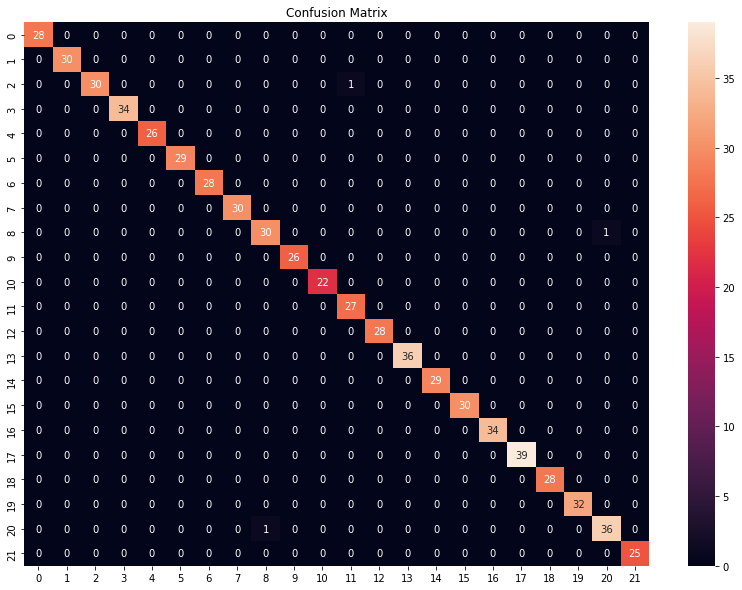

In [140]:
plt.figure(figsize=(14,10))
sns.heatmap(confusion_matrix(Y_test,Y_pred),annot=True)
plt.title("Confusion Matrix")
plt.show()

In [141]:
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        28
      banana       1.00      1.00      1.00        30
   blackgram       1.00      0.97      0.98        31
    chickpea       1.00      1.00      1.00        34
     coconut       1.00      1.00      1.00        26
      coffee       1.00      1.00      1.00        29
      cotton       1.00      1.00      1.00        28
      grapes       1.00      1.00      1.00        30
        jute       0.97      0.97      0.97        31
 kidneybeans       1.00      1.00      1.00        26
      lentil       1.00      1.00      1.00        22
       maize       0.96      1.00      0.98        27
       mango       1.00      1.00      1.00        28
   mothbeans       1.00      1.00      1.00        36
    mungbean       1.00      1.00      1.00        29
   muskmelon       1.00      1.00      1.00        30
      orange       1.00      1.00      1.00        34
      papaya       1.00    

In [142]:
model_names=['Logistic Regression','K-Nearest Neighbours','Support Vector Machine','Decision Tree','Random Forest']
model_accuracies=[LR_acc,KNN_acc,SVM_acc,DT_acc,RF_acc]
cv_accuracies=[LR_cv.mean(),KNN_cv.mean(),SVM_cv.mean(),DT_cv.mean(),RF_cv.mean()]


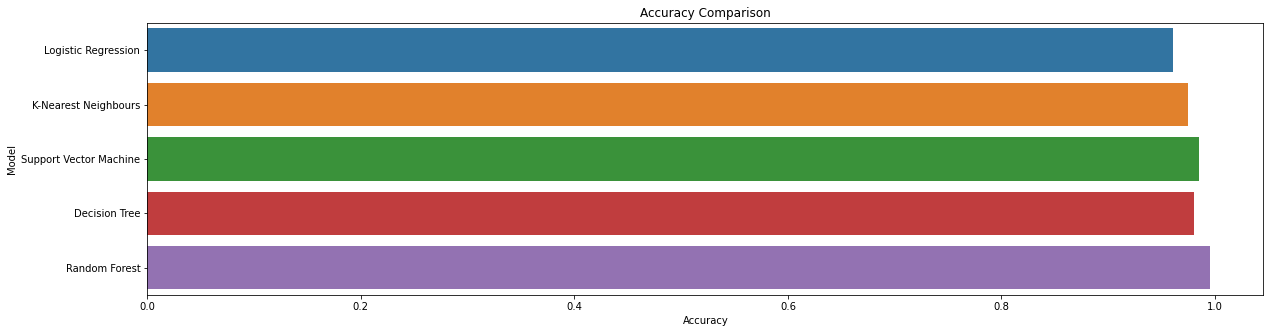

In [143]:
plt.figure(figsize=(20,5))
plt.title('Accuracy Comparison')
plt.xlabel('Accuracy')
plt.ylabel('Model')
sns.barplot(x = model_accuracies, y = model_names)
plt.show()

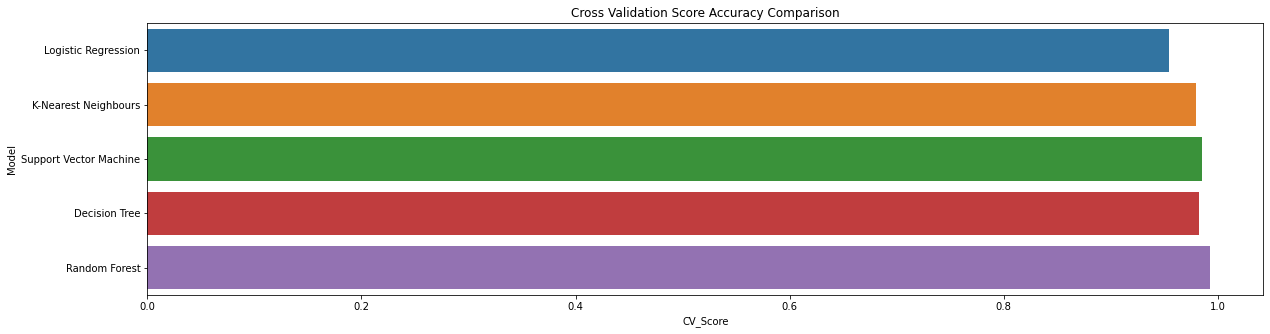

In [144]:
plt.figure(figsize=(20,5))
plt.title('Cross Validation Score Accuracy Comparison')
plt.xlabel('CV_Score')
plt.ylabel('Model')
sns.barplot(x = cv_accuracies, y = model_names)
plt.show()

#### Observation: Random Forest Giving the Most Accuracy among All the algorithms

In [156]:
X=np.array([[5,8,12,31.08368929,90.14362642,7.028746406000002,109.6894658]])

In [157]:
print(rf_classifier.predict(std_scalar.transform(X)))

['orange']


In [126]:
import pickle
file=open('crop_recommendation_model.pkl','wb')
pickle.dump(rf_classifier,file)
file.close()